In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display, HTML

base_folder = ".." # opendc-experiments-metamodel/src/main

# Read and explore output file

In [55]:
def read_topology(topology_name):
    print(f"Topology name: {topology_name}")
    df = pd.read_csv(f"{base_folder}/resources/env/{topology_name}.txt", delimiter=";") # e.g., simple.txt
    display(HTML(df.to_html()))
    
# read_topology("single")
read_topology("multi")

Topology name: multi


,ClusterID,ClusterName,Cores,Speed,Memory,numberOfHosts,memoryCapacityPerHost,coreCountPerHost
0,A01,A01,32,3.20,2048,1,256,32
1,B01,B01,48,2.93,1256,6,64,8
2,C01,C01,32,3.20,2048,2,128,16


# Output data in host

In [56]:
"""
We extract and analyze the data exported in the .parquet, from the host, as a very first step towards creating a metamodel
"""

df_single_trace_active_servers = pd.read_parquet(f"{base_folder}/output/host/topology=single/workload=bitbrains-small/seed=0/data-active-servers.parquet")

df_single_trace_active_servers_inv = pd.read_parquet(f"{base_folder}/output/host/topology=single/workload=bitbrains-small/seed=0/data-active-servers-inv.parquet")



df_single_trace_active_servers

,timestamp,host_id,cpu_count,mem_capacity,guests_terminated,guests_running,guests_error,guests_invalid,cpu_limit,cpu_usage,cpu_demand,cpu_utilization,cpu_time_active,cpu_time_idle,cpu_time_steal,cpu_time_lost,power_total,uptime,downtime,boot_time
0,1970-01-01 00:05:00+00:00,e220a839-7b1d-cdaf-0000-000000000000,8,128000,0,15,0,0,25600.0,25600.000000,25600.000000,1.000000,2400,0,550,0,105000.000000,300000,0,1970-01-01 00:00:00+00:00
1,1970-01-01 00:10:00+00:00,e220a839-7b1d-cdaf-0000-000000000000,8,128000,0,15,0,0,25600.0,25600.000000,25600.000000,1.000000,2400,0,272,0,105000.000000,300000,0,1970-01-01 00:00:00+00:00
2,1970-01-01 00:15:00+00:00,e220a839-7b1d-cdaf-0000-000000000000,8,128000,0,15,0,0,25600.0,25600.000000,25600.000000,1.000000,2400,0,186,0,105000.000000,300000,0,1970-01-01 00:00:00+00:00
3,1970-01-01 00:20:00+00:00,e220a839-7b1d-cdaf-0000-000000000000,8,128000,0,15,0,0,25600.0,15663.784180,15663.784180,0.611867,1468,931,0,0,87533.995628,300000,0,1970-01-01 00:00:00+00:00
4,1970-01-01 00:25:00+00:00,e220a839-7b1d-cdaf-0000-000000000000,8,128000,0,15,0,0,25600.0,16637.050781,16637.050781,0.649885,1560,840,0,0,89244.815826,300000,0,1970-01-01 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25917,1970-03-31 23:50:00+00:00,e220a839-7b1d-cdaf-0000-000000000000,8,128000,0,10,0,0,25600.0,11339.398438,11339.398438,0.442945,886,1514,0,0,76612.442764,300000,0,1970-01-01 00:00:00+00:00
25918,1970-03-31 23:55:00+00:00,e220a839-7b1d-cdaf-0000-000000000000,8,128000,0,10,0,0,25600.0,11510.740234,11510.740234,0.449638,1065,1335,0,0,79980.733894,300000,0,1970-01-01 00:00:00+00:00
25919,1970-04-01 00:00:00+00:00,e220a839-7b1d-cdaf-0000-000000000000,8,128000,0,10,0,0,25600.0,13061.491211,13061.491211,0.510215,1103,1297,0,0,80669.879478,300000,0,1970-01-01 00:00:00+00:00
25920,1970-04-01 00:05:00+00:00,e220a839-7b1d-cdaf-0000-000000000000,8,128000,0,10,0,0,25600.0,10848.335938,10848.335938,0.423763,1191,1209,0,0,82337.210297,300000,0,1970-01-01 00:00:00+00:00


In [57]:
df_single_trace_active_servers_inv

,timestamp,host_id,cpu_count,mem_capacity,guests_terminated,guests_running,guests_error,guests_invalid,cpu_limit,cpu_usage,cpu_demand,cpu_utilization,cpu_time_active,cpu_time_idle,cpu_time_steal,cpu_time_lost,power_total,uptime,downtime,boot_time
0,1970-01-01 00:05:00+00:00,e220a839-7b1d-cdaf-0000-000000000000,10,128000,0,15,0,0,32000.0,31473.076172,31473.076172,0.983534,2950,49,0,0,104259.015837,300000,0,1970-01-01 00:00:00+00:00
1,1970-01-01 00:10:00+00:00,e220a839-7b1d-cdaf-0000-000000000000,10,128000,0,15,0,0,32000.0,28499.767578,28499.767578,0.890618,2672,328,0,0,100077.798843,300000,0,1970-01-01 00:00:00+00:00
2,1970-01-01 00:15:00+00:00,e220a839-7b1d-cdaf-0000-000000000000,10,128000,0,15,0,0,32000.0,27587.158203,27587.158203,0.862099,2586,414,0,0,98794.441223,300000,0,1970-01-01 00:00:00+00:00
3,1970-01-01 00:20:00+00:00,e220a839-7b1d-cdaf-0000-000000000000,10,128000,0,15,0,0,32000.0,15663.784180,15663.784180,0.489493,1469,1531,0,0,82027.196503,300000,0,1970-01-01 00:00:00+00:00
4,1970-01-01 00:25:00+00:00,e220a839-7b1d-cdaf-0000-000000000000,10,128000,0,15,0,0,32000.0,16637.050781,16637.050781,0.519908,1559,1441,0,0,83395.852661,300000,0,1970-01-01 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25917,1970-03-31 23:50:00+00:00,e220a839-7b1d-cdaf-0000-000000000000,10,128000,0,10,0,0,32000.0,11339.398438,11339.398438,0.354356,886,2114,0,0,73289.933669,300000,0,1970-01-01 00:00:00+00:00
25918,1970-03-31 23:55:00+00:00,e220a839-7b1d-cdaf-0000-000000000000,10,128000,0,10,0,0,32000.0,11510.740234,11510.740234,0.359711,1066,1935,0,0,75984.566504,300000,0,1970-01-01 00:00:00+00:00
25919,1970-04-01 00:00:00+00:00,e220a839-7b1d-cdaf-0000-000000000000,10,128000,0,10,0,0,32000.0,13061.491211,13061.491211,0.408172,1102,1897,0,0,76535.884070,300000,0,1970-01-01 00:00:00+00:00
25920,1970-04-01 00:05:00+00:00,e220a839-7b1d-cdaf-0000-000000000000,10,128000,0,10,0,0,32000.0,10848.335938,10848.335938,0.339010,1192,1809,0,0,77869.748381,300000,0,1970-01-01 00:00:00+00:00


In [58]:
"""
We extract and analyze the data exported in the .parquet, from the host, as a very first step towards creating a metamodel
"""

df_multi_trace_active_servers = pd.read_parquet(f"{base_folder}/output/host/topology=multi/workload=bitbrains-small/seed=0/data-active-servers.parquet")

df_multi_trace_active_servers_inv = pd.read_parquet(f"{base_folder}/output/host/topology=multi/workload=bitbrains-small/seed=0/data-active-servers-inv.parquet")



df_multi_trace_active_servers

,timestamp,host_id,cpu_count,mem_capacity,guests_terminated,guests_running,guests_error,guests_invalid,cpu_limit,cpu_usage,cpu_demand,cpu_utilization,cpu_time_active,cpu_time_idle,cpu_time_steal,cpu_time_lost,power_total,uptime,downtime,boot_time
0,1970-01-01 00:05:00+00:00,f88bb8a8-724c-81ec-0000-000000000002,8,64000,0,5,0,0,23440.0,10988.033203,10988.033203,4.687727e-01,1125,1274,0,0,81094.853325,300000,0,1970-01-01 00:00:00+00:00
1,1970-01-01 00:05:00+00:00,1b39896a-51a8-749b-0000-000000000003,8,64000,0,5,0,0,23440.0,641.603821,641.603821,2.737218e-02,65,2334,0,0,61231.893844,300000,0,1970-01-01 00:00:00+00:00
2,1970-01-01 00:05:00+00:00,c584133a-c916-ab3c-0000-000000000000,16,128000,0,5,0,0,51200.0,10547.469727,10547.469727,2.060053e-01,988,3811,0,0,69270.356164,300000,0,1970-01-01 00:00:00+00:00
3,1970-01-01 00:05:00+00:00,53cb9f0c-747e-a2ea-0000-000000000004,8,64000,0,5,0,0,23440.0,351.659912,351.659912,1.500256e-02,36,2363,0,0,60675.262769,300000,0,1970-01-01 00:00:00+00:00
4,1970-01-01 00:05:00+00:00,e220a839-7b1d-cdaf-0000-000000000000,32,256000,0,5,0,0,102400.0,2214.168945,2214.168945,2.162274e-02,207,9392,0,0,60973.170219,300000,0,1970-01-01 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77764,1970-01-31 00:05:00+00:00,e220a839-7b1d-cdaf-0000-000000000000,32,256000,0,1,0,0,102400.0,-0.004555,-0.004555,-4.447997e-08,71,9529,0,0,60331.554319,300000,0,1970-01-01 00:00:00+00:00
77765,1970-01-31 00:05:00+00:00,06c45d18-8009-454f-0000-000000000001,8,64000,0,0,0,0,23440.0,-0.027481,-0.027481,-1.172401e-06,20,2380,0,0,60370.694438,300000,0,1970-01-01 00:00:00+00:00
77766,1970-01-31 00:05:00+00:00,2c829abe-1f45-32e1-0000-000000000005,8,64000,0,0,0,0,23440.0,-0.027397,-0.027397,-1.168821e-06,992,1407,0,0,78613.335137,300000,0,1970-01-01 00:00:00+00:00
77767,1970-01-31 00:05:00+00:00,3ee57890-41c9-8ac3-0000-000000000001,16,128000,0,1,0,0,51200.0,0.002783,0.002783,5.435199e-08,15,4785,0,0,60139.700749,300000,0,1970-01-01 00:00:00+00:00


In [59]:
df_multi_trace_active_servers_inv

,timestamp,host_id,cpu_count,mem_capacity,guests_terminated,guests_running,guests_error,guests_invalid,cpu_limit,cpu_usage,cpu_demand,cpu_utilization,cpu_time_active,cpu_time_idle,cpu_time_steal,cpu_time_lost,power_total,uptime,downtime,boot_time
0,1970-01-01 00:05:00+00:00,f88bb8a8-724c-81ec-0000-000000000002,8,64000,0,0,0,0,23440.0,0.000000,0.000000,0.000000,0,2400,0,0,60000.000000,300000,0,1970-01-01 00:00:00+00:00
1,1970-01-01 00:05:00+00:00,1b39896a-51a8-749b-0000-000000000003,8,64000,0,0,0,0,23440.0,0.000000,0.000000,0.000000,0,2400,0,0,60000.000000,300000,0,1970-01-01 00:00:00+00:00
2,1970-01-01 00:05:00+00:00,c584133a-c916-ab3c-0000-000000000000,16,128000,0,0,0,0,51200.0,0.000000,0.000000,0.000000,0,4800,0,0,60000.000000,300000,0,1970-01-01 00:00:00+00:00
3,1970-01-01 00:05:00+00:00,53cb9f0c-747e-a2ea-0000-000000000004,8,64000,0,0,0,0,23440.0,0.000000,0.000000,0.000000,0,2400,0,0,60000.000000,300000,0,1970-01-01 00:00:00+00:00
4,1970-01-01 00:05:00+00:00,e220a839-7b1d-cdaf-0000-000000000000,32,256000,0,33,0,0,102400.0,54850.355469,54850.355469,0.535648,5142,4457,0,0,84104.229771,300000,0,1970-01-01 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155524,1970-03-02 00:05:00+00:00,e220a839-7b1d-cdaf-0000-000000000000,32,256000,0,11,0,0,102400.0,13254.208008,13254.208008,0.129436,1108,8492,0,0,65195.780025,300000,0,1970-01-01 00:00:00+00:00
155525,1970-03-02 00:05:00+00:00,06c45d18-8009-454f-0000-000000000001,8,64000,0,0,0,0,23440.0,0.000000,0.000000,0.000000,0,2400,0,0,60000.000000,300000,0,1970-01-01 00:00:00+00:00
155526,1970-03-02 00:05:00+00:00,2c829abe-1f45-32e1-0000-000000000005,8,64000,0,0,0,0,23440.0,0.000000,0.000000,0.000000,0,2400,0,0,60000.000000,300000,0,1970-01-01 00:00:00+00:00
155527,1970-03-02 00:05:00+00:00,3ee57890-41c9-8ac3-0000-000000000001,16,128000,0,0,0,0,51200.0,0.000000,0.000000,0.000000,0,4800,0,0,60000.000000,300000,0,1970-01-01 00:00:00+00:00


<Axes: >

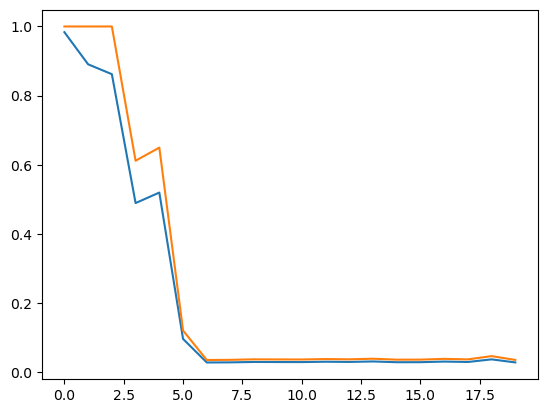

In [60]:
"""
Up to this point, we read the data from the .parquet file
"""

# todo revise: something here doesn't work? or maybe it does?
df_single_trace_active_servers_inv.cpu_utilization[:20].plot()
df_single_trace_active_servers.cpu_utilization[:20].plot()

<Axes: >

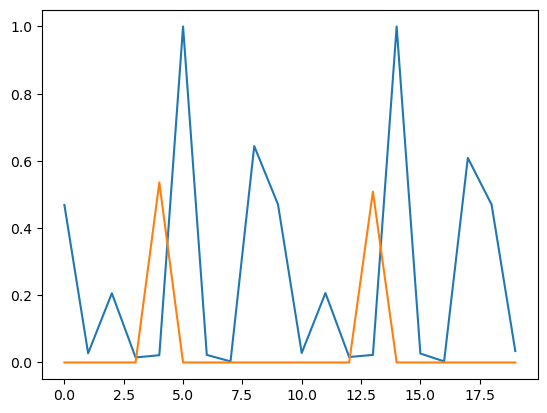

In [61]:
df_multi_trace_active_servers.cpu_utilization[:20].plot()
df_multi_trace_active_servers_inv.cpu_utilization[:20].plot()